In [36]:
import pandas as pd
import numpy as np

arr = np.random.RandomState(54).rand(20,6)#numpy used for easier coding
df = pd.DataFrame(arr)   #pandas for better representation and cross verification
df

,0,1,2,3,4,5
0,0.420183,0.363239,0.184877,0.518283,0.008605,0.968936
1,0.801381,0.757312,0.671484,0.029657,0.391562,0.404794
2,0.189631,0.767106,0.616723,0.926274,0.325124,0.253154
3,0.720218,0.996957,0.307873,0.171987,0.175385,0.163827
4,0.585014,0.473536,0.460757,0.235154,0.856217,0.470894
5,0.054583,0.993257,0.195556,0.712525,0.816390,0.471057
6,0.261086,0.440619,0.209383,0.472904,0.231383,0.161177
7,0.217062,0.160715,0.946975,0.621742,0.728785,0.876091
8,0.941675,0.120947,0.882725,0.096098,0.782749,0.657467
9,0.882239,0.653608,0.041728,0.630739,0.711061,0.454718


In [70]:
df.to_excel(r'D:\PCA excel sheets\Test.xlsx',index=False) #desktop write requires privileges

In [38]:
from sklearn.preprocessing import StandardScaler #use own function
scale = StandardScaler()
scale.fit(arr)
arr = scale.transform(arr)
arr

array([[-0.33357874, -0.56639837, -0.74734024,  0.53650307, -1.81460907,
         1.64982526],
       [ 1.00978676,  0.65444127,  1.03267175, -1.35016003, -0.43377765,
        -0.51446715],
       [-1.14605756,  0.68478209,  0.83235529,  2.11182336, -0.67333398,
        -1.09622232],
       [ 0.72376232,  1.39686481, -0.29741876, -0.80060209, -1.21325164,
        -1.4389221 ],
       [ 0.24729698, -0.22470031,  0.26183053, -0.55670281,  1.24163532,
        -0.26088008],
       [-1.62197329,  1.38540099, -0.70827386,  1.28650351,  1.09802985,
        -0.26025285],
       [-0.89424532, -0.32667594, -0.65769625,  0.36128772, -1.01133798,
        -1.44908727],
       [-1.0493886 , -1.19381933,  2.04041831,  0.93597423,  0.78215139,
         1.29363192],
       [ 1.50418922, -1.31702372,  1.8053921 , -1.09361989,  0.97672916,
         0.45489361],
       [ 1.29473482,  0.33316519, -1.27097954,  0.97071492,  0.71824486,
        -0.32293589],
       [ 0.55264718,  0.7772094 , -0.70775776, -0.

In [39]:
#df.cov()    #check for covariance matrix code

In [40]:
#df.mean(axis=0)  # check for mean finding code

In [41]:
mean = list()             #code finds the mean of each column or variable
values,variables = arr.shape 
for i in range(variables):
    sum = 0.0
    for j in range(values):
        sum+= arr[j][i]
    mean.append(sum/values)
mean = np.array(mean)
mean



array([-1.33226763e-16,  4.10782519e-16, -2.60902411e-16,  1.38777878e-17,
       -2.22044605e-16,  1.44328993e-16])

In [42]:
cov_mat = np.identity(variables)    #uses determined mean to compute covariance matrix


for i in range(variables):
    for k in range(variables):
        sum = 0.0
        for j in range(values):
            sum += (arr[j][i]-mean[i])*(arr[j][k]-mean[k])     #j is row here not i or k (was previously doing opposite)
        cov_mat[i][k] = sum/(values-1)                       # formula has -1 (not for population)

cov_mat
        

array([[ 1.05263158,  0.03481145, -0.19796666, -0.24702487,  0.04029798,
         0.05123575],
       [ 0.03481145,  1.05263158, -0.26362413,  0.00792345,  0.02617446,
        -0.54434136],
       [-0.19796666, -0.26362413,  1.05263158, -0.13982386,  0.25156206,
        -0.0606268 ],
       [-0.24702487,  0.00792345, -0.13982386,  1.05263158,  0.18288568,
        -0.0526459 ],
       [ 0.04029798,  0.02617446,  0.25156206,  0.18288568,  1.05263158,
        -0.06097983],
       [ 0.05123575, -0.54434136, -0.0606268 , -0.0526459 , -0.06097983,
         1.05263158]])

In [43]:
#df.cov()

In [44]:
cor_mat = np.zeros((variables,variables))                   #zeros takes shape, not a square matrix dimension
import math

for i in range(variables):
    for j in range(variables):
        cor_mat[j][i]= cov_mat[j][i]/(pow(cov_mat[i][i],0.5)*pow(cov_mat[j][j],0.5)) #use abs or else will get complex no.(no need)
        
cor_mat

array([[ 1.        ,  0.03307088, -0.18806833, -0.23467363,  0.03828308,
         0.04867396],
       [ 0.03307088,  1.        , -0.25044293,  0.00752728,  0.02486574,
        -0.51712429],
       [-0.18806833, -0.25044293,  1.        , -0.13283267,  0.23898395,
        -0.05759546],
       [-0.23467363,  0.00752728, -0.13283267,  1.        ,  0.17374139,
        -0.05001361],
       [ 0.03828308,  0.02486574,  0.23898395,  0.17374139,  1.        ,
        -0.05793084],
       [ 0.04867396, -0.51712429, -0.05759546, -0.05001361, -0.05793084,
         1.        ]])

In [45]:
#df.corr()

In [46]:
def orthogonalize(a):
    Q = np.zeros(a.shape)
    
    for i in range(a.shape[0]):
        Q[:,i] = a[:,i]
        for j in range(i):
            Q[:,i] -= ((scalar_multiplication(Q[:,i],Q[:,j]))/pow(magnitude(Q[:,j]),2))*Q[:,j] #slicing producing 1d array
    return Q


In [47]:
def scalar_multiplication(a,b):
    c = [float(a[i]*b[i]) for i in range(a.shape[0])]  # each number is of type numpy.float64 not float
    sum = 0.0
    for i in c:
        sum+=i
    return sum


In [48]:
def magnitude(m):     #takes single column input
    sum=0.0
    for i in m:
        sum += i*i                        # use zero index or else causes cartesian product
    return pow(sum,0.5)

In [49]:
def unit_vectors(v):                       #returns vectors of unit(column only) length from matrix,(magnitude function call included)
    for i in range(v.shape[0]):          #orthonormalization 
        v[:,i] /= magnitude(v[:,i])
    return v

In [50]:
def matrix_multiplication(A,B):
    M = np.zeros((A.shape[0],B.shape[1]))
    for i in range(A.shape[0]):
        for k in range(B.shape[1]):
            for j in range(A.shape[1]):
                M[i][k]+=A[i][j]*B[j][k]
    return M


In [51]:
def hessenberg(A):
    i = 0 
    size = A.shape[0]
    while i < size - 2:
        x = A[i + 1:,i]
        w = magnitude(x)*np.identity(x.shape[0])[:,0]
        v = (np.subtract(w,x).reshape(x.shape[0],1))
        temp = np.identity(x.shape[0]) - 2*matrix_multiplication(v,np.transpose(v))/pow(magnitude(v),2)
        H = np.identity(size)
        H[i+1:,i+1:] = temp
        A = matrix_multiplication(A,H)
        A = matrix_multiplication(H,A)
        i+=1
    return A
        
        
    

In [52]:
def diagonal_subtraction(A,L_val):
    A=A.copy()
    for i in range(A.shape[0]):
        A[i,i]= A[i,i] - L_val
    return A
    

In [53]:
def echelon_form(B):                            #make corrections
    for i in range(B.shape[0]):
        j = i
        while j < B.shape[0]:
            if abs(B[i][j])<0.001:
                B[i][j] = 0.0
                j+=1
            else:
                div = B[i][j]
                for k in range(B.shape[0]):
                    B[i][k]/=div
                for k in range(i+1,B.shape[0]):
                    mul = B[k][j]/B[i][j]
                    for l in range(B.shape[0]):
                        B[k][l] -= B[i][l] * mul
                break

            

In [54]:
def find_vector(A):                        #row echelon form input
    x = np.zeros(A.shape[0])
    for i in range(1,A.shape[0]+1):
        if A[-i,-i] == 0:
            x[-i] = 1
            
        for j in range(1,i):
            x[-i]-=x[-j]*A[-i,-j]
    return x

In [55]:
def variance_ratio(A):
    ratio = np.zeros(A.shape[0])
    sum = 0.0
    for i in range(A.shape[0]):
        sum += A[i,i]
    for i in range(A.shape[0]):
        ratio[i] = (A[i,i]/sum)*100
    return ratio

In [56]:
A = cov_mat.copy()
A = hessenberg(A)
k = 500                   #what should be the value of k?
for i in range(k):
    Q = orthogonalize(A)
    Q = unit_vectors(Q)         #orthonormal matrix required hence have to find the unit vectors
    A = matrix_multiplication(A,Q)
    A = matrix_multiplication(np.transpose(Q),A)
pd.DataFrame(A)

,0,1,2,3,4,5
0,1.646151e+00,-3.548821e-17,-1.130148e-16,-2.714782e-16,-9.991566e-17,1.506030e-16
1,1.072101e-29,1.436988e+00,-1.320779e-16,2.866529e-18,-1.328089e-16,2.174822e-17
2,1.397296e-32,1.389158e-32,1.208370e+00,-6.700255e-18,-2.929835e-16,3.601959e-16
3,-7.579566e-32,5.669038e-34,3.079363e-29,1.061196e+00,-1.425641e-16,1.526192e-16
4,2.302242e-32,2.940323e-32,-1.495058e-31,-1.191446e-32,5.833634e-01,1.029067e-16
5,-1.209685e-32,9.656769e-33,6.431862e-32,1.989921e-32,-1.725012e-32,3.797200e-01


In [57]:
#pd.DataFrame(np.dot(np.linalg.qr(cov_mat)[1],np.linalg.qr(cov_mat)[0])) #in-built algorithm verification
(np.linalg.eig(cov_mat))#order may not  be same

(array([0.37971998, 0.58336336, 1.06119644, 1.20837013, 1.43698827,
        1.64615129]),
 array([[ 0.18093142, -0.47030409, -0.58236826, -0.38384361, -0.50856644,
         -0.03081143],
        [ 0.59599793,  0.36291902,  0.0254303 , -0.07994839, -0.04936304,
         -0.70964857],
        [ 0.47589479, -0.29176368,  0.26486966, -0.52351441,  0.51378164,
          0.28320179],
        [ 0.26264092, -0.45103803, -0.33806284,  0.65494433,  0.41088821,
         -0.12456631],
        [-0.23706552,  0.40914449, -0.65934338, -0.28623495,  0.5093708 ,
         -0.0166725 ],
        [ 0.51028827,  0.43719937, -0.20254479,  0.24763376, -0.21601887,
          0.63202181]]))

In [58]:
eigvector_mat = np.zeros(A.shape)
for i in range(A.shape[0]):
    B = diagonal_subtraction(cov_mat,A[i,i])
    echelon_form(B)
    eigvector_mat[:,i] = find_vector(B)
unit_vectors(eigvector_mat)


array([[-0.03081143,  0.50856644, -0.38384361,  0.58236826, -0.47030409,
         0.18093142],
       [-0.70964857,  0.04936304, -0.07994839, -0.0254303 ,  0.36291902,
         0.59599793],
       [ 0.28320179, -0.51378164, -0.52351441, -0.26486966, -0.29176368,
         0.47589479],
       [-0.12456631, -0.41088821,  0.65494433,  0.33806284, -0.45103803,
         0.26264092],
       [-0.0166725 , -0.5093708 , -0.28623495,  0.65934338,  0.40914449,
        -0.23706552],
       [ 0.63202181,  0.21601887,  0.24763376,  0.20254479,  0.43719937,
         0.51028827]])

In [59]:
B = diagonal_subtraction(cov_mat,A[0,0])
B
for i in range(2):
    j = i
    while j < B.shape[0]:
        if abs(B[i][j])<0.001:
            B[i][j] = 0.0
            j+=1
        else:
            div = B[i][j]
            for k in range(B.shape[0]):
                B[i][k]/=div
            for k in range(i+1,B.shape[0]):
                mul = B[k][j]/B[i][j]
                for l in range(B.shape[0]):
                    B[k][l] -= B[i][l] * mul
            break
pd.DataFrame(B)   

,0,1,2,3,4,5
0,1.0,-0.058653,0.333547,0.416203,-0.067897,-0.086325
1,-0.0,1.000000,0.465335,0.011100,-0.048249,0.915226
2,0.0,0.000000,-0.399412,-0.054374,0.224841,0.174186
3,0.0,0.000000,-0.054374,-0.490634,0.165797,-0.067962
4,0.0,0.000000,0.224841,0.165797,-0.589407,-0.083620
5,0.0,0.000000,0.174186,-0.067962,-0.083620,-0.093652


In [60]:
# B = diagonal_subtraction(cor_mat,A[0,0])                  #don't take triangular matrix, take original covariance matrix
# pd.DataFrame(B)
# Q = unit_vectors(orthogonalize(B))
# R = matrix_multiplication(np.transpose(Q),B)

In [61]:
# B = diagonal_subtraction(cov_mat,A[0,0])
# for i in range(9):
#     div = B[i,i]
#     for j in range(A.shape[0]):
#         B[i,j]/=div
#     for j in range(i+1,A.shape[0]):
#         div = B[j,i]/B[i,i]
#         for k in range(A.shape[0]):
#             B[j,k]-=B[i,k]*div
# pd.DataFrame(B)

In [62]:
from sklearn.decomposition import PCA 

In [63]:
analyse = PCA()
analyse.fit(arr)

PCA()

In [64]:
pd.DataFrame(analyse.components_)

,0,1,2,3,4,5
0,-0.030811,-0.709649,0.283202,-0.124566,-0.016672,0.632022
1,-0.508566,-0.049363,0.513782,0.410888,0.509371,-0.216019
2,0.383844,0.079948,0.523514,-0.654944,0.286235,-0.247634
3,0.582368,-0.025430,-0.264870,0.338063,0.659343,0.202545
4,-0.470304,0.362919,-0.291764,-0.451038,0.409144,0.437199
5,-0.180931,-0.595998,-0.475895,-0.262641,0.237066,-0.510288


In [65]:
import matplotlib.pyplot as plt
r = variance_ratio(A)
r

array([26.06406205, 22.75231429, 19.13252712, 16.80227704,  9.23658652,
        6.01223297])

In [66]:
arr2 = analyse.fit_transform(arr)
pd.DataFrame(arr2)

,0,1,2,3,4,5
0,1.206723,-1.246623,-1.843905,-0.662829,-0.093745,-0.659393
1,-0.352820,-0.679865,1.868057,-0.548748,-0.332123,-0.549891
2,-1.159591,1.738244,-1.253806,-0.857371,-1.162606,-0.751771
3,-1.887287,-1.225962,0.767186,-0.897299,-0.511053,-0.165024
4,0.109753,0.479914,0.998642,0.658005,0.370800,0.538259
5,-1.476804,1.536728,-1.346461,0.313968,1.227466,-0.139946
6,-0.870880,0.079330,-0.880942,-1.176455,-0.716376,1.074299
7,2.145348,2.144481,-0.139536,-0.027073,-0.071620,-0.790172
8,1.807014,0.177506,2.300415,0.797715,-0.620380,-0.059737
9,-0.973262,-0.493442,-0.491972,1.818508,-0.402332,0.252141


In [67]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()
# scale.fit(arr)
# arr = scale.transform(arr)

In [68]:

arr2 = matrix_multiplication(arr,eigvector_mat)
arr2


array([[ 1.20672314,  1.24662307,  1.8439047 , -0.66282946, -0.09374457,
         0.65939293],
       [-0.35281964,  0.67986499, -1.86805703, -0.54874828, -0.3321227 ,
         0.5498908 ],
       [-1.15959077, -1.73824372,  1.25380646, -0.85737086, -1.16260628,
         0.75177054],
       [-1.88728695,  1.22596163, -0.76718609, -0.89729871, -0.51105264,
         0.16502402],
       [ 0.10975291, -0.47991384, -0.99864248,  0.65800475,  0.37080034,
        -0.53825925],
       [-1.47680433, -1.53672848,  1.34646136,  0.3139682 ,  1.2274661 ,
         0.13994582],
       [-0.87088017, -0.07932964,  0.88094172, -1.17645497, -0.71637571,
        -1.07429942],
       [ 2.14534776, -2.14448081,  0.13953554, -0.02707349, -0.07161994,
         0.79017244],
       [ 1.80701443, -0.17750563, -2.30041544,  0.79771478, -0.62038044,
         0.05973712],
       [-0.97326234,  0.49344216,  0.49197201,  1.81850755, -0.40233221,
        -0.2521406 ],
       [-0.12581656,  2.11445787,  0.28421223, -0.

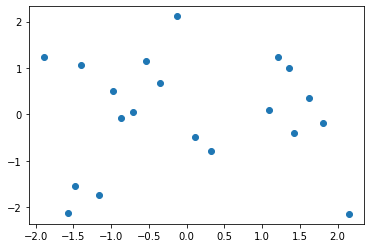

In [69]:
plt.scatter(arr2[:,0],arr2[:,1])